In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [9]:
data = pd.read_csv(r"D:\Project_Room\Regression.csv")
data.head()

,room_id,room_type,Total Booking,Total Amount,Month,Days_Before_Checkin,price_per_night
0,1,Standard,2,2472,1,2,78
1,1,Standard,1,175,2,2,78
2,1,Standard,1,1794,4,4,78
3,1,Standard,2,3163,8,12,78
4,1,Standard,3,4005,11,6,78


In [14]:
data['room_type'].isnull().sum()

0

In [ ]:
cate = ['room_type']
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_features = encoder.fit_transform(data[cate])
encoded_feature_names = encoder.get_feature_names_out(cate)

df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=data.index)
data = data.drop(columns=cate).reset_index(drop=True)
data = pd.concat([data, df_encoded], axis=1)

print(data.head())


   room_id  Total Booking  Total Amount  Month  Days_Before_Checkin  \
0        1              2          2472      1                    2   
1        1              1           175      2                    2   
2        1              1          1794      4                    4   
3        1              2          3163      8                   12   
4        1              3          4005     11                    6   

   price_per_night  room_type_Executive  room_type_Presidential  \
0               78                  0.0                     0.0   
1               78                  0.0                     0.0   
2               78                  0.0                     0.0   
3               78                  0.0                     0.0   
4               78                  0.0                     0.0   

   room_type_Standard  room_type_Suite  
0                 1.0              0.0  
1                 1.0              0.0  
2                 1.0              0.0  
3     

In [16]:
X = data.drop(columns=['price_per_night'])
y = data['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


In [17]:
model = RandomForestRegressor(n_estimators= 100, random_state= 42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'r2: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

r2: 0.95
Mean Absolute Error: 15.20


In [20]:
result = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
result.head()

,Actual Price,Predicted Price
282,134,141.61
479,228,217.59
1307,176,182.41
1254,291,293.81
507,220,216.61


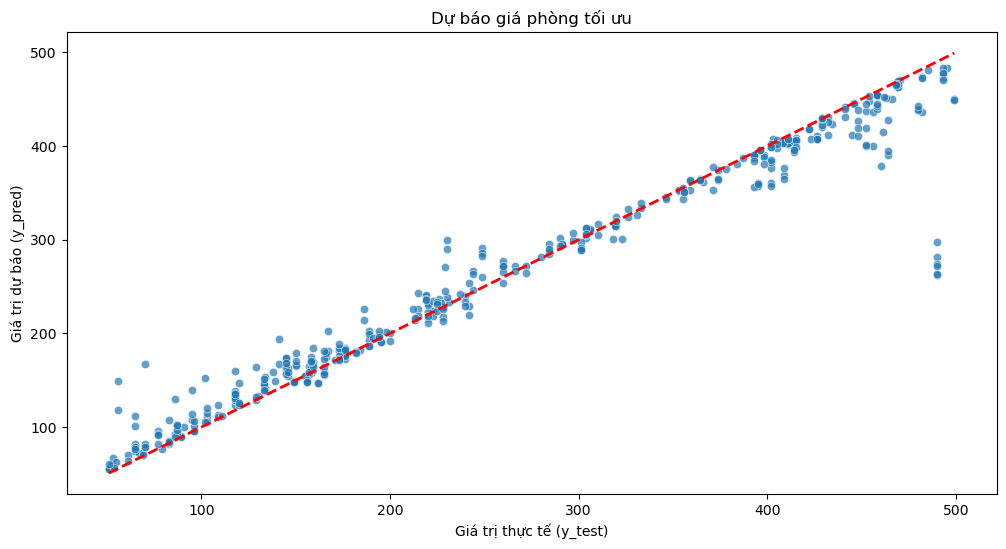

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y= y_pred, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth = 2)
plt.xlabel('Giá trị thực tế (y_test)')
plt.ylabel('Giá trị dự báo (y_pred)')
plt.title('Dự báo giá phòng tối ưu')
plt.show()
